model 1 : stock price prediction model

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load the data into a pandas dataframe
df = pd.read_csv("/Users/martinravelo/Desktop/all_stocks_5yr.csv")

# Clean and pre-process the data
# Drop the Name column as it is not needed for the analysis
df.drop(['Name'], axis=1, inplace=True)

# Check for missing values and impute if necessary
df = df.dropna()

# Normalize the data using min-max normalization
scaler = MinMaxScaler()
df[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']])

# Select relevant variables
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the performance of the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)


Mean Absolute Error:  0.00016524674860821423


model 2 : Market trend Anlysis

/var/folders/5w/k3sxtsxs7x72dq_cxr_vyl240000gn/T/ipykernel_1858/1653907170.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(df['date'].dt.year).mean()


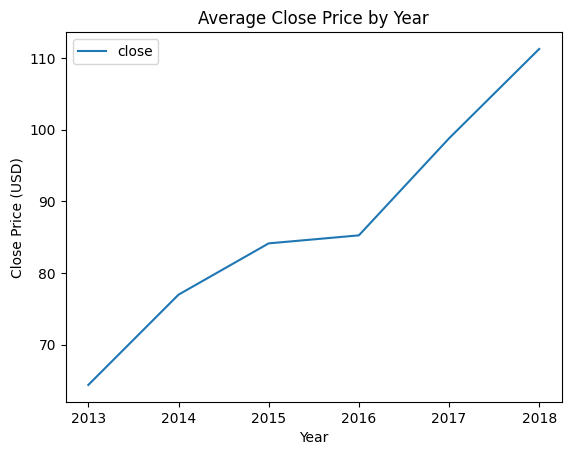

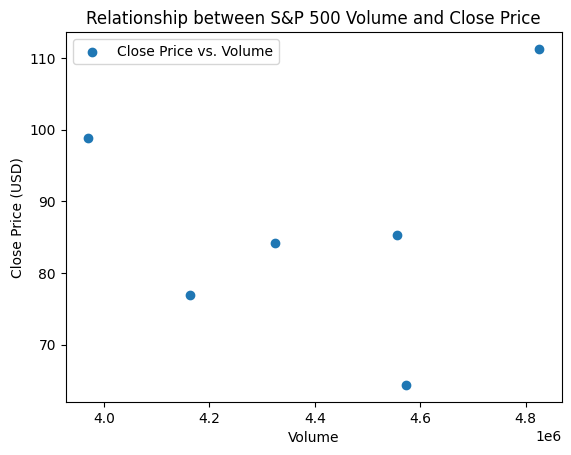

In [5]:
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_csv("/Users/martinravelo/Desktop/all_stocks_5yr.csv")

# Convert date column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Filter only the data from 2013 to 2018
df = df[(df['date'].dt.year >= 2013) & (df['date'].dt.year <= 2018)]

df = pd.read_csv("/Users/martinravelo/Desktop/all_stocks_5yr.csv")
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'].dt.year.isin([2013, 2014, 2015, 2016, 2017, 2018])]
df = df.groupby(df['date'].dt.year).mean()
df.plot(y='close', kind='line')
plt.xlabel('Year')
plt.ylabel('Close Price (USD)')
plt.title('Average Close Price by Year')
plt.show()



# Plot the relationship between Volume and Close Price
plt.scatter(df['volume'], df['close'], label='Close Price vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price (USD)')
plt.title('Relationship between S&P 500 Volume and Close Price')
plt.legend()
plt.show()

algorithmic trading


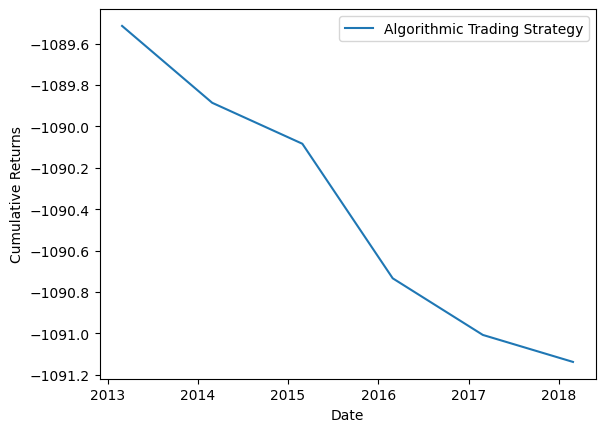

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_csv("/Users/martinravelo/Desktop/all_stocks_5yr.csv")

# Filter the data to only include the dates between 2013 and 2018
df = df[(df['date'] >= '2013-01-01') & (df['date'] <= '2018-12-31')]

# Convert the date column to a datetime index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Create a new column for returns
df['returns'] = df['close'].pct_change()

# Define the trading strategy
df['position'] = np.where(df['close'] < df['close'].rolling(30).mean(), 1, 0)

# Calculate the cumulative returns
df['cumulative_returns'] = (df['returns'] * df['position']).cumsum()

# Downsample the data to only include one date per year
df = df.groupby(pd.Grouper(freq='12M')).last()

# Plot the results
plt.plot(df.index, df['cumulative_returns'], label='Algorithmic Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


threshold-based approach to detect potential fraudulent behavior

In [2]:
import pandas as pd
from fbprophet import Prophet

# Load the stock data into a Pandas dataframe
df = pd.read_csv("/Users/martinravelo/Desktop/all_stocks_5yr.csv")

# Rename the columns to fit Prophet's requirements
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]

# Create a Prophet model and fit the data
model = Prophet()
model.fit(df)

# Specify the number of days you want to forecast
future = model.make_future_dataframe(periods=365)

# Make the forecast
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast, xlabel="Date", ylabel="Close Price")





ModuleNotFoundError: No module named 'fbprophet'